DIABETES PREDICTION USING MACHINE LEARNING 

In [2]:
#Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")


In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score,classification_report,RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import f1_score,roc_auc_score,recall_score 

In [4]:
df= pd.read_csv('Desktop/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
df.isnull().sum() 

Pregnancies          0
Glucose              0
Blood Pressure       0
Skin Thickness       0
Insulin              0
BMI                  0
Diabetes Pedigree    0
Age                  0
Outcome              0
dtype: int64

Data Visualization

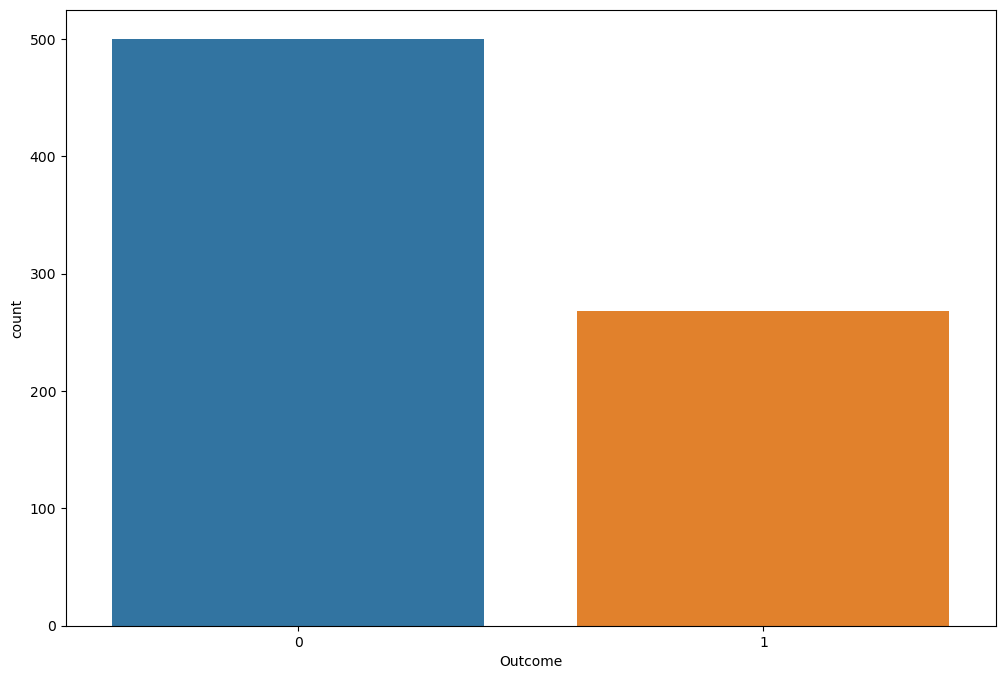

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x='Outcome',data = df)
plt.show()

Observing Outliers 

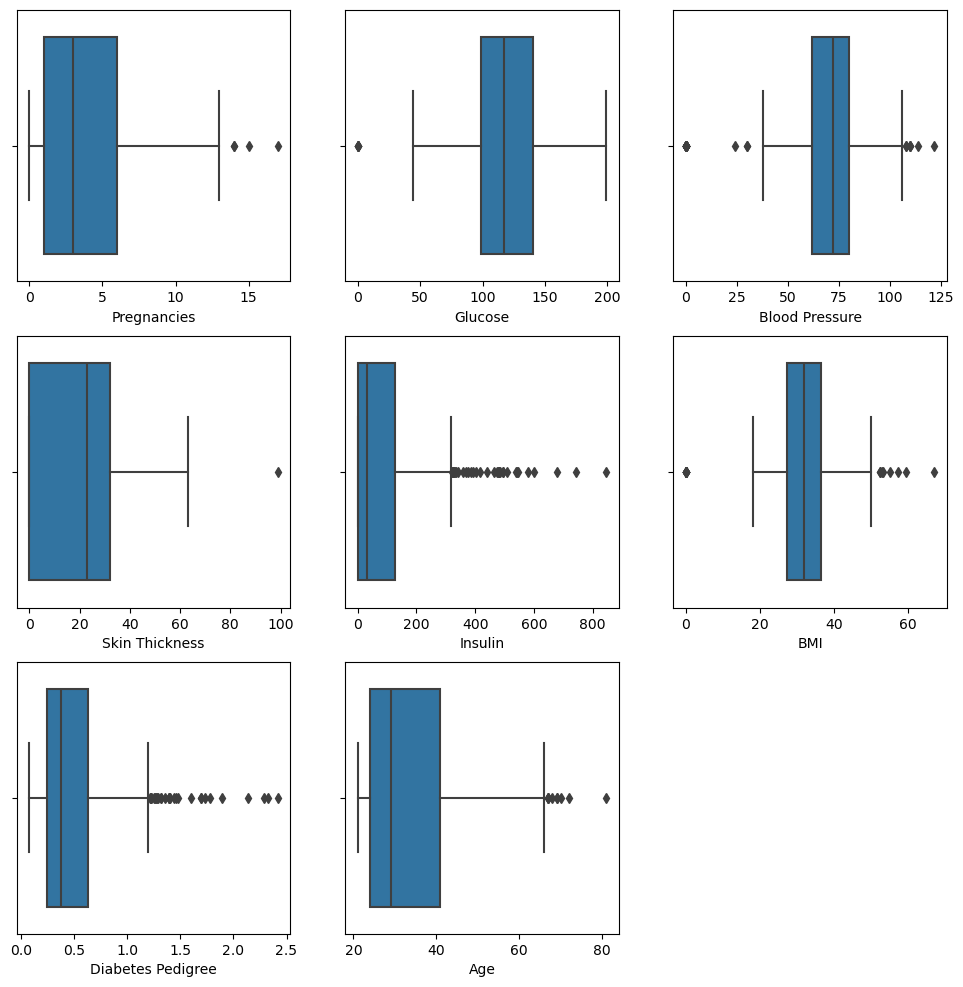

In [9]:
plt.figure(figsize=(12,12))
for i,col in enumerate(['Pregnancies','Glucose','Blood Pressure','Skin Thickness','Insulin','BMI','Diabetes Pedigree','Age']):
    plt.subplot(3,3,  i+1)
    sns.boxplot(x= col, data=df)
plt.show()    

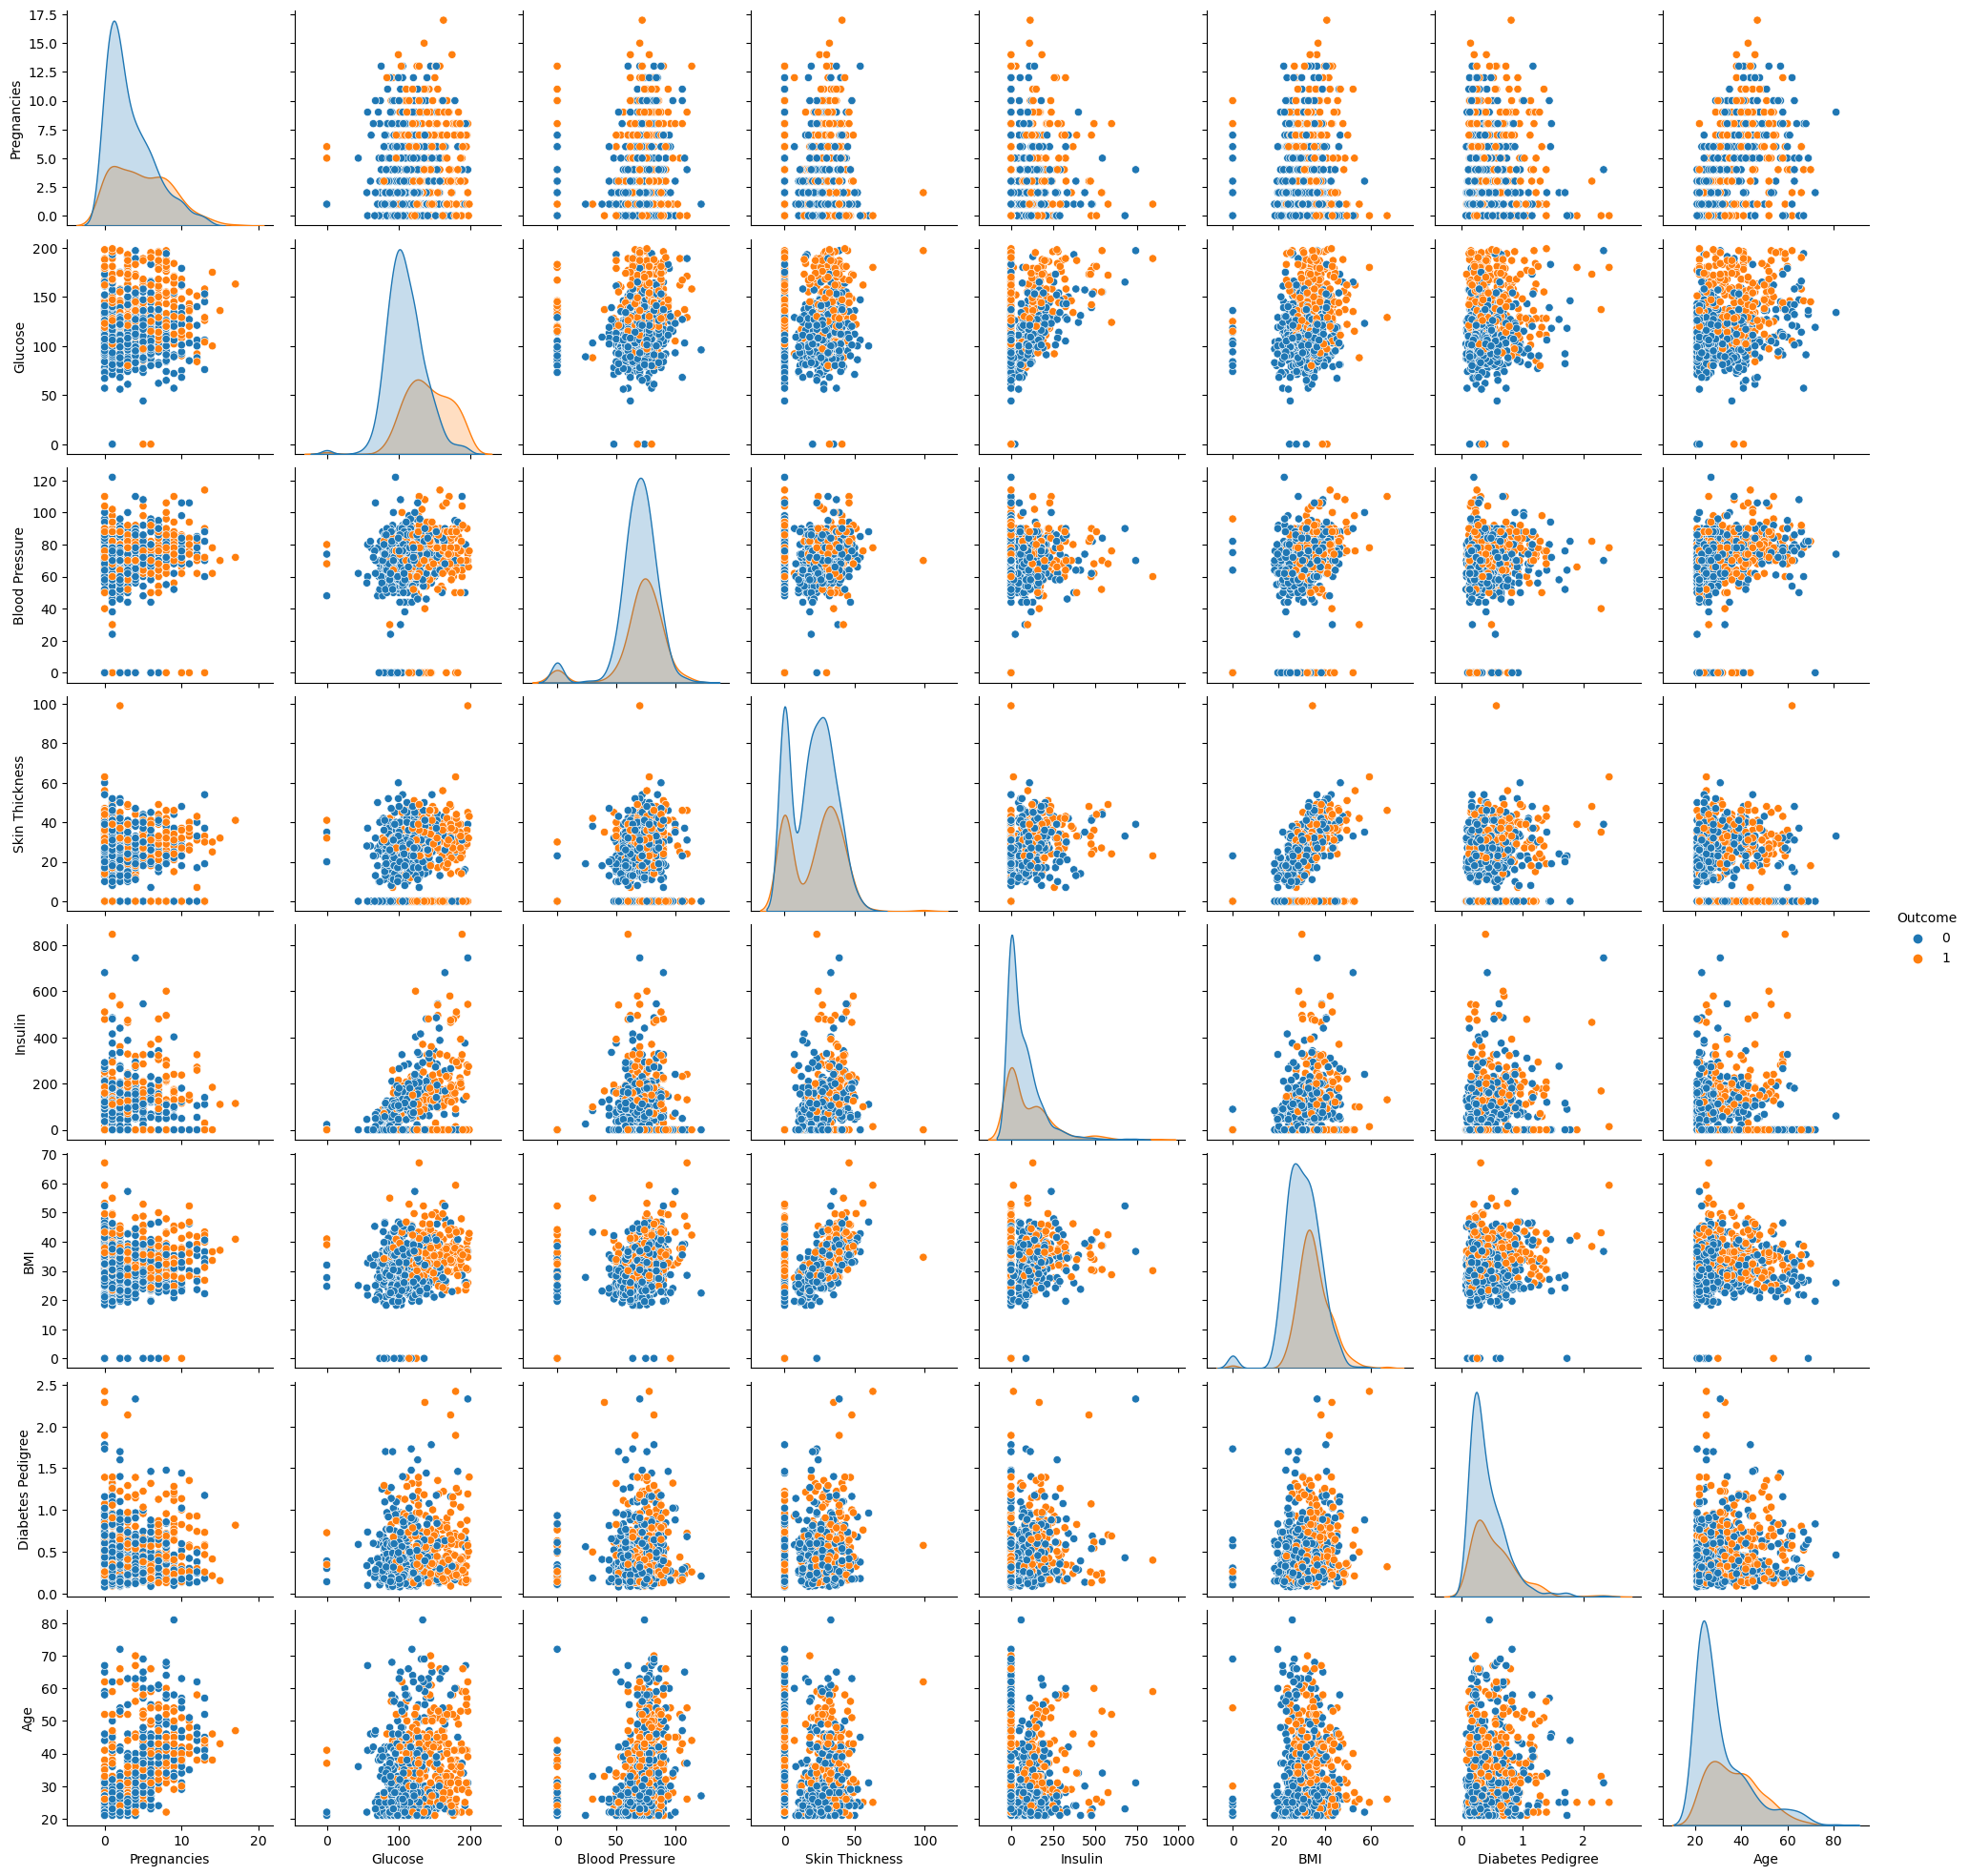

In [10]:
sns.pairplot(df, hue='Outcome')
plt.show()

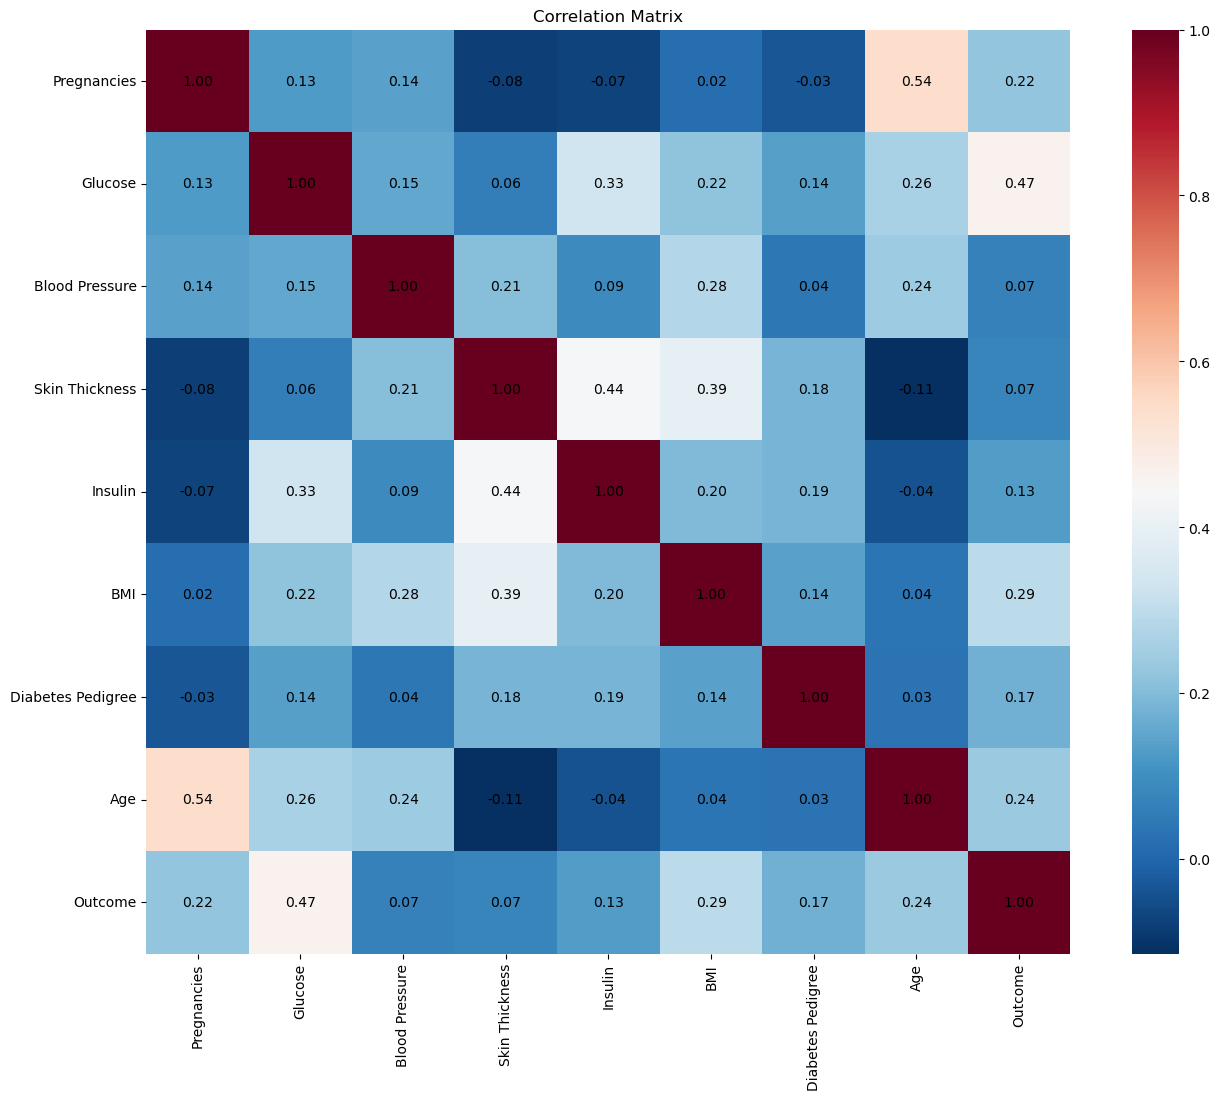

In [11]:
#Correlation matrix
corr = df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=False, cmap="RdBu_r", cbar=True, square=True)
plt.title('Correlation Matrix')
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        value = corr.iloc[i, j]
        plt.text(j + 0.5, i + 0.5, f'{value:.2f}',
                 ha='center', va='center', color='black', fontsize=10)

plt.show()

SPLITTING THE DATA

In [13]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

In [15]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

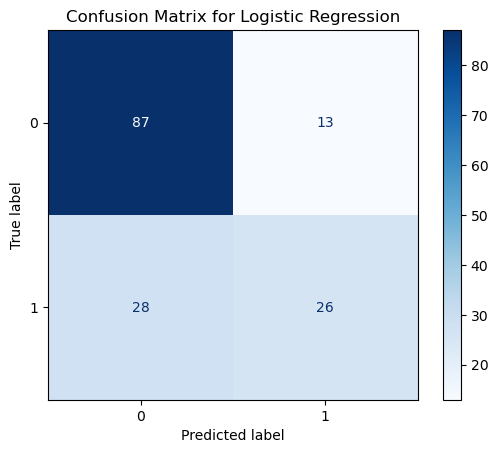

0.7337662337662337
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       115
           1       0.48      0.67      0.56        39

    accuracy                           0.73       154
   macro avg       0.68      0.71      0.68       154
weighted avg       0.77      0.73      0.75       154



In [16]:
#LOGISTIC REGRESSION 
LR_model=LogisticRegression()

LR_model.fit(X_train_scaled, y_train)

y_pred = LR_model.predict(X_test_scaled)
y_train_pred = LR_model.predict(X_train_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

log_f1 = f1_score(y_test, y_pred)
log_acc = accuracy_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)




In [18]:
#Finding best parameters using GridSearchCV 
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)
param_grid = {"penalty" : penalty,"l1_ratio" : l1_ratio,"C" : C}

In [19]:
LR_grid_model = LogisticRegression(solver='saga', max_iter=5000, class_weight = "balanced")
LR_grid_model = GridSearchCV(LR_grid_model, param_grid = param_grid)

In [20]:
LR_grid_model.fit(X_train_scaled, y_train)


GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=5000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [21]:
LR_grid_model.best_estimator_

LogisticRegression(C=3.3598182862837818, class_weight='balanced',
                   l1_ratio=0.6842105263157894, max_iter=5000,
                   penalty='elasticnet', solver='saga')

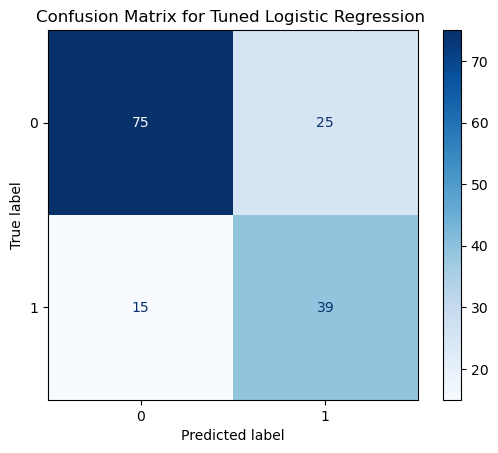

0.7402597402597403
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        90
           1       0.72      0.61      0.66        64

    accuracy                           0.74       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.74      0.74      0.74       154



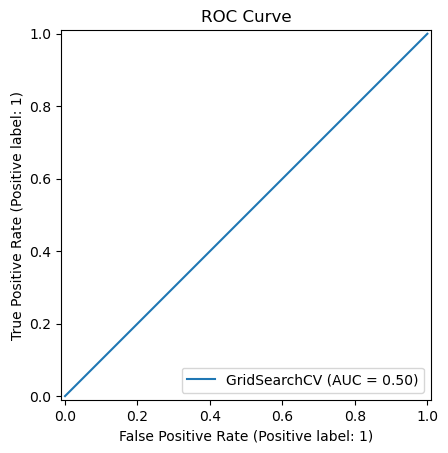

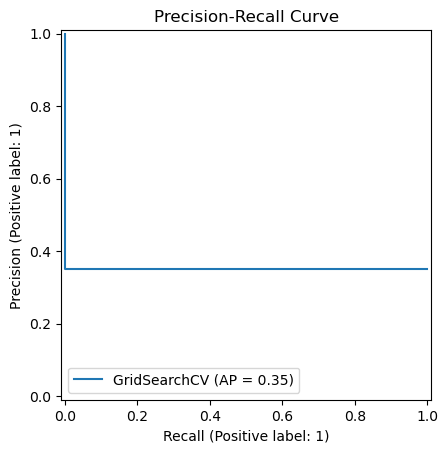

In [22]:
y_pred = LR_grid_model.predict(X_test_scaled)
y_train_pred = LR_grid_model.predict(X_train_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR_grid_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Tuned Logistic Regression ')
plt.show()
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

log_grid_f1 = f1_score(y_test, y_pred)
log_grid_acc = accuracy_score(y_test, y_pred)
log_grid_recall = recall_score(y_test, y_pred)
log_grid_auc = roc_auc_score(y_test, y_pred)

roc_display = RocCurveDisplay.from_estimator(LR_grid_model, X_test, y_test)
roc_display.ax_.set_title('ROC Curve')
plt.show()
pr_display = PrecisionRecallDisplay.from_estimator(LR_grid_model, X_test, y_test)
pr_display.ax_.set_title('Precision-Recall Curve')
plt.show()

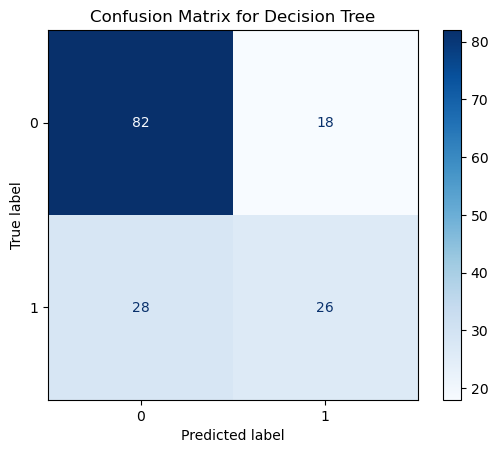

0.7012987012987013
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       110
           1       0.48      0.59      0.53        44

    accuracy                           0.70       154
   macro avg       0.65      0.67      0.66       154
weighted avg       0.72      0.70      0.71       154



In [32]:
#Decision Tree Classifier 
DT_model = DecisionTreeClassifier(class_weight="balanced", random_state=42)
DT_model.fit(X_train_scaled, y_train)
y_pred = DT_model.predict(X_test_scaled)
y_train_pred = DT_model.predict(X_train_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree')
plt.show()
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
dt_f1 = f1_score(y_test, y_pred)
dt_acc = accuracy_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)





In [33]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 9, 15]}

In [34]:
DT_grid_model = DecisionTreeClassifier(class_weight = "balanced", random_state=42)
DT_grid_model = GridSearchCV(estimator=DT_grid_model,param_grid=param_grid,scoring='recall',n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


In [35]:
DT_grid_model.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=3,
                       min_samples_leaf=5, min_samples_split=15,
                       random_state=42)

0.7077922077922078
              precision    recall  f1-score   support

           0       0.66      0.86      0.75        77
           1       0.80      0.56      0.66        77

    accuracy                           0.71       154
   macro avg       0.73      0.71      0.70       154
weighted avg       0.73      0.71      0.70       154



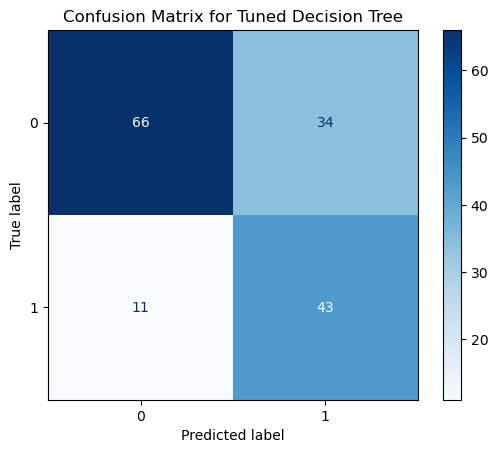

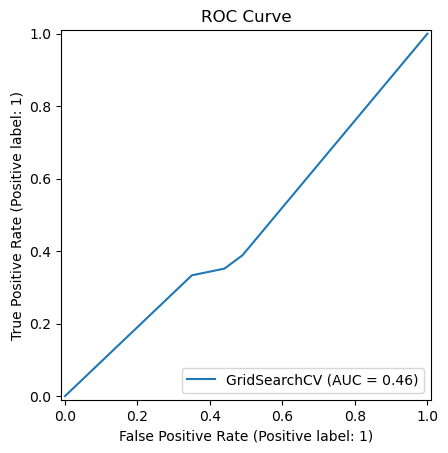

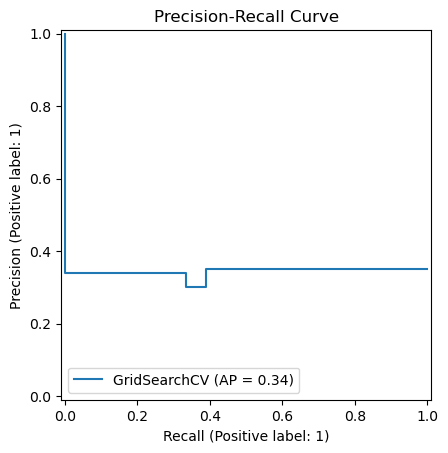

In [36]:
y_pred = DT_grid_model.predict(X_test_scaled)

y_train_pred = DT_grid_model.predict(X_train_scaled)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT_grid_model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix for Tuned Decision Tree')
plt.show()
dt_grid_f1 = f1_score(y_test, y_pred)
dt_grid_acc = accuracy_score(y_test, y_pred)
dt_grid_recall = recall_score(y_test, y_pred)
dt_grid_auc = roc_auc_score(y_test, y_pred)

roc_display = RocCurveDisplay.from_estimator(DT_grid_model, X_test, y_test)
roc_display.ax_.set_title('ROC Curve')
plt.show()
pr_display = PrecisionRecallDisplay.from_estimator(DT_grid_model, X_test, y_test)
pr_display.ax_.set_title('Precision-Recall Curve')
plt.show()

0.7532467532467533
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       108
           1       0.57      0.67      0.62        46

    accuracy                           0.75       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.77      0.75      0.76       154



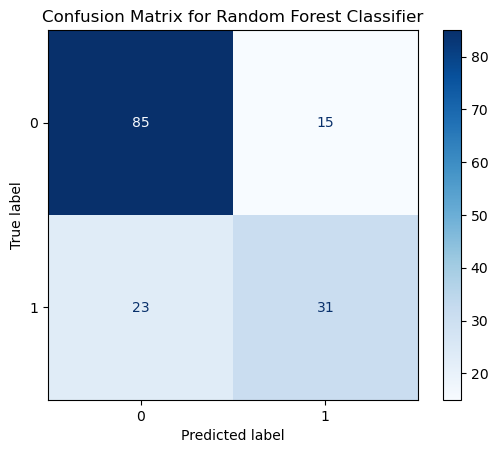

In [38]:
#Random Forest Classifier
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)
RF_model.fit(X_train_scaled, y_train)
y_pred = RF_model.predict(X_test_scaled)
y_train_pred = RF_model.predict(X_train_scaled)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF_model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()
rf_f1 = f1_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)


In [ ]:
param_grid = {'n_estimators':[50, 100, 300],'max_features':[2, 3, 4], 'max_depth':[3, 5, 7, 9],'min_samples_split':[2, 5, 8]}
RF_grid_model = RandomForestClassifier(random_state=101)
RF_grid_model = GridSearchCV(estimator=RF_grid_model,  param_grid=param_grid, scoring = "recall",  n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train) 

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
RF_grid_model.best_estimator_

In [ ]:
y_pred = RF_grid_model.predict(X_test_scaled)
y_train_pred = RF_grid_model.predict(X_train_scaled)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF_grid_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Tuned Random Forest Classifier')
plt.show()
rf_grid_f1 = f1_score(y_test, y_pred)
rf_grid_acc = accuracy_score(y_test, y_pred)
rf_grid_recall = recall_score(y_test, y_pred)
rf_grid_auc = roc_auc_score(y_test, y_pred)

roc_display = RocCurveDisplay.from_estimator(RF_grid_model, X_test, y_test)
roc_display.ax_.set_title('ROC Curve')
plt.show()
pr_display = PrecisionRecallDisplay.from_estimator(RF_grid_model, X_test, y_test)
pr_display.ax_.set_title('Precision-Recall Curve')
plt.show()





In [ ]:
#Support Vector Machine Classifier 
SVM_model = SVC(random_state=42)
SVM_model.fit(X_train_scaled, y_train)
y_pred = SVM_model.predict(X_test_scaled)
y_train_pred = SVM_model.predict(X_train_scaled)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM_model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()
svm_f1 = f1_score(y_test, y_pred)
svm_acc = accuracy_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_auc = roc_auc_score(y_test, y_pred)

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000],'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],'kernel': ['rbf', 'linear']}
SVM_grid_model = SVC(random_state=42)
SVM_grid_model = GridSearchCV(SVM_grid_model, param_grid, verbose=3, refit=True)

In [ ]:
SVM_grid_model.fit(X_train_scaled, y_train)

In [ ]:
SVM_grid_model.best_estimator_

In [ ]:
y_pred = SVM_grid_model.predict(X_test_scaled)
y_train_pred = SVM_grid_model.predict(X_train_scaled)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM_grid_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Tuned SVM')
plt.show()
svm_grid_f1 = f1_score(y_test, y_pred)
svm_grid_acc = accuracy_score(y_test, y_pred)
svm_grid_recall = recall_score(y_test, y_pred)
svm_grid_auc = roc_auc_score(y_test, y_pred)

roc_display = RocCurveDisplay.from_estimator(SVM_grid_model, X_test, y_test)
roc_display.ax_.set_title('ROC Curve')
plt.show()
pr_display = PrecisionRecallDisplay.from_estimator(SVM_grid_model, X_test, y_test)
pr_display.ax_.set_title('Precision-Recall Curve')
plt.show()




In [ ]:
#Comparing performance of the different models
compare = pd.DataFrame({"Model": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"],
                        "F1": [log_f1, dt_grid_f1, rf_grid_f1, svm_grid_f1],
                        "Recall": [log_recall, dt_grid_recall, rf_grid_recall, svm_grid_recall],
                        "Accuracy": [log_acc, dt_grid_acc, rf_grid_acc, svm_grid_acc],
                        "ROC_AUC": [log_auc, dt_grid_auc, rf_grid_auc, svm_grid_auc ]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,14))
plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare)
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare)
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare)
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare )
labels(ax)

plt.show()